In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [5]:
data  = pd.read_csv("FuelConsumptionCo2.csv")
data.head()
#To show the first 5 elements

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
data.count()
#For checking if there are missing elements .

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64

In [7]:
test_df = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
test_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


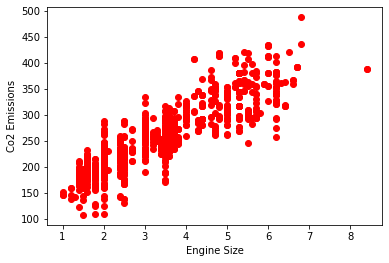

In [8]:
plt.scatter(test_df.ENGINESIZE , test_df.CO2EMISSIONS , color = 'red' )
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()
#plt show is used to show the plot here and not in another pop up window

In [9]:
mask = np.random.rand(len(data)) < 0.8
train = test_df[mask]
test= test_df[~mask]
#mask is a boolean array so , ~is used to inverse the true to false

In [23]:
#Linear Regression one independent and one dependent variable
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

reg.fit (train_x, train_y)
print('Coefficient',reg.coef_)
print('Intercept',reg.intercept_)

Coefficient [[39.15570968]]
Intercept [124.88261162]


In [25]:
from sklearn.metrics import r2_score
y_hat = reg.predict(test[['ENGINESIZE']])
x = np.asanyarray(test[['ENGINESIZE']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("R2-score: %.2f" , r2_score(y_hat , y) )

R2-score: %.2f 0.7063798237374868


In [19]:
#Now using polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
trainx_poly = poly.fit_transform(train_x)
trainx_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [20]:
regp = linear_model.LinearRegression()
train_yp = regp.fit(trainx_poly , train_y)
print ('Coefficients: ', regp.coef_)
print ('Intercept: ',regp.intercept_)

Coefficients:  [[ 0.         47.68801697 -1.14008314]]
Intercept:  [111.30033794]


In [24]:
testx_poly = poly.fit_transform(test_x)
test_yp = regp.predict(testx_poly)

print("R2-score: %.2f" , r2_score(test_yp , test_y) )

R2-score: %.2f 0.7131532473976754


As seen polynomial regression performs better hear as its r2 score is a bit higher.